In [1]:
# Import libralies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

root_path = '/content/drive/MyDrive/Codes/Riemannian-interior-point-trust-region-method'

Mounted at /content/drive


In [9]:
# Set variables
problem_name = "Rosenbrock"

solver_name = ["RSQO_reghess_corr1e-02", "RSQO_reghess_corr1e-04", "RALM_SteepestDescent", "RIPM_RepMat_gamma0.9_beta0.0001_theta0.5", "RIPTRM_Exact_RepMat", "RIPTRM_tCG"]

# solver_name = ["RALM_SteepestDescent", "RSQO_reghess_corr1e-08", "RIPM_RepMat_gamma0.9_beta0.0001_theta0.5", "RIPTRM_Exact_RepMat", "RIPTRM_tCG"]

# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
# solver_name = ["RIPTRM",  "RALM", "RIPM", "RSQO"]

# Paul Tol's color-blind-friendly palette
tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
# tol_colors = ["#4477AA", "#66CCEE", "#228833", "#EE6677", "#AA3377", "#BBBBBB"]

In [10]:
# Preliminaries

def set_display_name(solver_name):
  if solver_name == "RIPTRM_tCG":
    return "RIPTRM (tCG)"
  elif solver_name == "RIPTRM_Exact_RepMat":
    return "RIPTRM (exact)"
  elif solver_name == "RALM_SteepestDescent":
    return "RALM"
  elif solver_name == "RSQO_reghess_corr1e-04":
    return "RSQO ($\\delta=10^{-4}$)"
  elif solver_name == "RSQO_reghess_corr1e-02":
    return "RSQO ($\\delta=10^{-2}$)"
  elif solver_name == "RIPM_RepMat_gamma0.9_beta0.0001_theta0.5":
    return "RIPM"

def set_xlabel(xaxis_col_name=None):
  if xaxis_col_name == None:
    return "Step"
  elif xaxis_col_name == "time":
    return "Time (sec)"

def set_ylabel(yaxis_col_name, is_y_logscale):
  ylabel = None
  if yaxis_col_name == "residual":
    ylabel = "KKT residual"
  elif yaxis_col_name == "second_order_residual":
    ylabel = r"$\text{Min. eigenvalue of } \text{Hess}_{x}\mathcal{L} \text{ over } C_{\text{w}}$"
    # ylabel = "2nd-order residual"
  if is_y_logscale:
    ylabel = ylabel + " (log10 scale)"
  return ylabel

def set_color(solver_name):
  tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]
  if solver_name == "RIPTRM_tCG":
    return tol_colors[5]
  elif solver_name == "RIPTRM_Exact_RepMat":
    return tol_colors[4]
  elif solver_name == "RALM_SteepestDescent":
    return tol_colors[2]
  elif solver_name == "RSQO_reghess_corr1e-04":
    return tol_colors[1]
  elif solver_name == "RSQO_reghess_corr1e-02":
    return tol_colors[0]
  elif solver_name == "RIPM_RepMat" or solver_name == "RIPM_RepMat_gamma0.9_beta0.0001_theta0.5":
    return tol_colors[3]


          residual
0     2.000000e+07
1     2.242123e+05
2     2.206022e+04
3     2.053247e+05
4     2.370727e+04
...            ...
4498  1.452672e-03
4499  1.050576e-01
4500  3.188294e-01
4501  4.928992e-01
4502  4.928992e-01

[4503 rows x 1 columns]
          residual
0     2.000000e+07
1     2.282261e+03
2     9.301245e+02
3     6.636982e+02
4     3.719166e+03
...            ...
4493  5.806178e-04
4494  6.454040e-05
4495  1.260302e-02
4496  1.501546e-01
4497  1.501546e-01

[4498 rows x 1 columns]
          residual
0     2.000000e+07
1     6.119109e+02
2     9.220366e+01
3     4.739361e+00
4     1.323092e+01
...            ...
1110  3.942950e+00
1111  3.425725e+00
1112  8.881990e+00
1113  5.781571e+00
1114  2.699741e+00

[1115 rows x 1 columns]
         residual
0    2.000000e+07
1    9.874242e+06
2    7.470813e+06
3    5.776328e+06
4    4.933632e+06
..            ...
554  2.327883e+06
555  2.327872e+06
556  2.327832e+06
557  2.327819e+06
558  2.327806e+06

[559 rows x 1 columns]


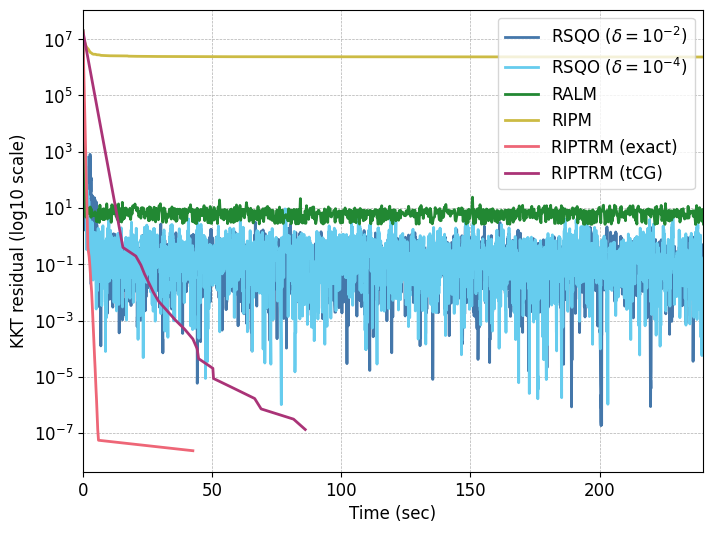

In [13]:
# Graph plot

# Collect information from '{solver}_log.csv' with a specific instance and a fixed initial point
# problem_name = "StableIdentification"
problem_instance = 1
problem_initialpoint = "a"
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
file_name = "log"

xaxis_col_name = "time"
yaxis_col_name = "residual"
is_y_logscale = True

# plot_graph(problem_name, problem_instance, problem_initialpoint, solver_name, file_name, yaxis_col_name, xaxis_col_name, is_ylogscale)

# Initial setting
plt.figure(figsize=(8, 6))
# plt.title(f"{xaxis_col_name} vs {yaxis_col_name} for {problem_name}-{problem_instance}-{problem_initialpoint}")
plt.ylabel(f"{yaxis_col_name}")

# # Paul Tol's bright color-blind-friendly palette
# tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]

# Collect information
load_path = f"{root_path}/intermediate/{problem_name}/{problem_instance}/{problem_initialpoint}"
for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":
      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      # log = log[(log["inner_status"] == "converged") | (log["inner_status"] == "successful") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      print(yloaded)
      yloaded.columns = [solver]

    xloaded = log.loc[:,xaxis_col_name]
    xloaded = xloaded.to_frame()
    xloaded.columns = [solver]
    color = set_color(solver)
    display_name = set_display_name(solver)
    plt.plot(xloaded, yloaded, label=display_name, color=color, linestyle="-", linewidth=2)


# # set x, y, display names
# display_name = set_display_name(solver)
xlabel = set_xlabel(xaxis_col_name)
ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
plt.xlabel(xlabel, fontsize="large")
plt.ylabel(ylabel, fontsize="large")

plt.tick_params(axis="x", labelsize="large")
plt.tick_params(axis="y", labelsize="large")
    # # load the x-axis column
    # if xaxis_col_name is None:
    #     # plt.xlabel(f"step")
    #     # If not specified, then use the index as the x-axis
    #     plt.plot(yloaded, label=display_name, color=tol_colors[i % len(tol_colors)], linestyle="-", linewidth=2)
    # else:
    #     plt.xlabel(f"{xaxis_col_name}")
    #     xloaded = log.loc[:,xaxis_col_name]
    #     xloaded = xloaded.to_frame()
    #     xloaded.columns = [solver]
    #     plt.plot(xloaded, yloaded, label=display_name, color=tol_colors[i % len(tol_colors)], linestyle="-", linewidth=2)

# Set the legend, grid, and y-axis scale
# plt.legend(title="Solver", loc="upper right", fontsize="medium", title_fontsize="large")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])  # 順序を逆にしてlegendに渡す
plt.legend(loc="upper right",  title_fontsize="large", fontsize="large")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
if is_y_logscale:
    plt.yscale("log")

# plt.gca().set_ylim(top=10)
plt.gca().set_xlim(left=0, right=240)

# Save the plot
output_folder = f'{root_path}/result/{problem_name}/{problem_instance}/{problem_initialpoint}'
os.makedirs(f"{root_path}/result/{problem_name}", exist_ok=True)
os.makedirs(f"{root_path}/result/{problem_name}/{problem_instance}", exist_ok=True)
os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}.pdf", bbox_inches="tight")
plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer.pdf", bbox_inches="tight")

      iteration        time          cost      distance      residual  \
0             0    0.000000  5.000001e+07  0.000000e+00  2.000000e+07   
1             1    0.042598  4.000127e+07  2.202935e+00  2.242123e+05   
2             2    0.083675  4.000009e+07  1.402250e-01  2.206022e+04   
3             3    0.125045  4.000006e+07  7.897170e-01  2.053247e+05   
4             4    0.166201  4.000005e+07  7.629084e-02  2.370727e+04   
...         ...         ...           ...           ...           ...   
4498       4498  239.720388  4.000001e+07  1.360989e-05  1.452672e-03   
4499       4499  239.763177  4.000001e+07  2.684242e-04  1.050576e-01   
4500       4500  239.809853  4.000001e+07  2.887955e-04  3.188294e-01   
4501       4501  239.856291  4.000001e+07  2.996484e-04  4.928992e-01   
4502       4502  240.132327  4.000001e+07  5.575504e-08  4.928992e-01   

          gradnorm  complviolation  dualviolation  manviolation  maxviolation  \
0     2.000000e+07    1.749714e+00        

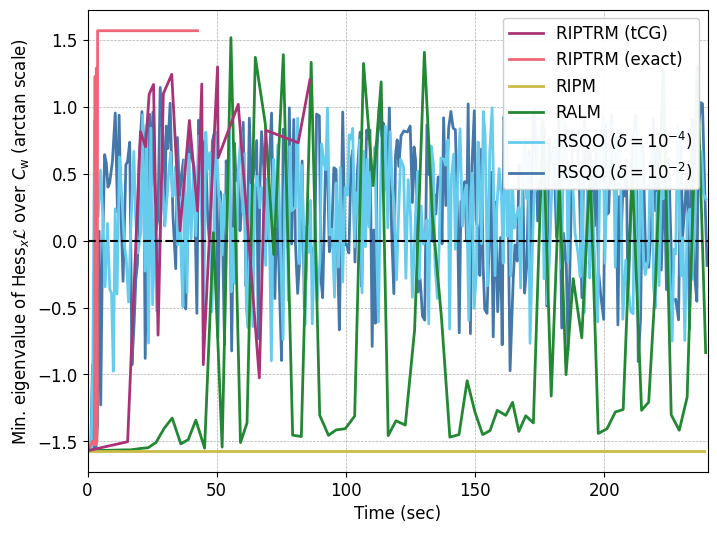

In [20]:
# Graph plot

# Collect information from '{solver}_log.csv' with a specific instance and a fixed initial point
# problem_name = "StableIdentification"
problem_instance = 1
problem_initialpoint = "a"
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
file_name = "log"

xaxis_col_name = "time"
yaxis_col_name = "second_order_residual"
is_y_logscale = False

# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat"]
# solver_name = ["RIPTRM_tCG", "RIPTRM_Exact_RepMat", "RALM_SteepestDescent", "RIPM_RepMat", "RSQO_reghess"]
# solver_name = ["RALM_SteepestDescent"]

# plot_graph(problem_name, problem_instance, problem_initialpoint, solver_name, file_name, yaxis_col_name, xaxis_col_name, is_ylogscale)

# Initial setting
plt.figure(figsize=(8, 6))
# plt.title(f"{xaxis_col_name} vs {yaxis_col_name} for {problem_name}-{problem_instance}-{problem_initialpoint}")
plt.ylabel(f"{yaxis_col_name}")

# # Paul Tol's bright color-blind-friendly palette
# tol_colors = ["#4477AA", "#66CCEE", "#228833", "#CCBB44", "#EE6677", "#AA3377", "#BBBBBB"]

# Collect information
load_path = f"{root_path}/intermediate/{problem_name}/{problem_instance}/{problem_initialpoint}"
for i, solver in enumerate(solver_name):
    # load the basic file
    log = pd.read_csv(f"{load_path}/{solver}_{file_name}.csv")

    # load the y-axis column
    if solver == "RIPTRM_tCG" or solver == "RIPTRM_Exact_RepMat":
      log = log[(log["inner_status"] == "converged") | (log["inner_status"].isna())]
      # log = log[(log["inner_status"] == "converged") | (log["inner_status"] == "successful") | (log["inner_status"].isna())]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      yloaded.columns = [solver]
    else:

      # 100ステップごとのグループを作成
      log["step_group"] = (np.arange(len(log)) // 15)
      print(log)
      log = log.loc[log.groupby("step_group")["time"].idxmin()]
      # 小数点を切り捨てて整数部分を取得
      # log["int_value"] = np.ceil(log["time"]).astype(int)
      # 各整数部分ごとに最も早いタイムスタンプの行を取得
      # log = log.loc[log.groupby("int_value")["time"].idxmax()]
      yloaded = log.loc[:,yaxis_col_name]
      yloaded = yloaded.to_frame()
      print(yloaded)
      yloaded.columns = [solver]

    # load the y-axis column
    yloaded = log.loc[:,yaxis_col_name]
    # yloaded = yloaded.apply(lambda x: min(0, x))
    yloaded = yloaded.apply(np.arctan)
    yloaded = yloaded.to_frame()
    yloaded.columns = [solver]

    # set x, y, display names
    display_name = set_display_name(solver)


    color = set_color(solver)

    # load the x-axis column
    if xaxis_col_name is None:
        # plt.xlabel(f"step")
        # If not specified, then use the index as the x-axis
        plt.plot(yloaded, label=display_name, color=color, linestyle="-", linewidth=2)
    else:
        plt.xlabel(f"{xaxis_col_name}")
        xloaded = log.loc[:,xaxis_col_name]
        xloaded = xloaded.to_frame()
        xloaded.columns = [solver]
        plt.plot(xloaded, yloaded, label=display_name, color=color, linestyle="-", linewidth=2)

xlabel = set_xlabel(xaxis_col_name)
ylabel = set_ylabel(yaxis_col_name, is_y_logscale)
ylabel = ylabel + " (arctan scale)"
plt.xlabel(xlabel, fontsize="large")
plt.ylabel(ylabel, fontsize="large")
plt.tick_params(axis="x", labelsize="large")
plt.tick_params(axis="y", labelsize="large")

plt.axhline(0, color="black", linestyle="--", linewidth=1.5)

# Set the legend, grid, and y-axis scale
# plt.legend(title="Solver", loc="upper right", fontsize="medium", title_fontsize="large")

# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(loc="lower right", fontsize="large", title_fontsize="large")
# plt.legend(handles[::-1], labels[::-1])  # 順序を逆にしてlegendに渡す
handles, labels = plt.gca().get_legend_handles_labels()
leg = plt.legend(handles[::-1], labels[::-1], loc="upper right", fontsize="large", title_fontsize="large")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
leg.get_frame().set_alpha(0.95)
if is_y_logscale:
    plt.yscale("log")

plt.gca().set_xlim(left=0, right=240)
# plt.gca().set_ylim(top=100, bottom=-20)

# Save the plot
output_folder = f'{root_path}/result/{problem_name}/{problem_instance}/{problem_initialpoint}'
os.makedirs(f"{root_path}/result/{problem_name}", exist_ok=True)
os.makedirs(f"{root_path}/result/{problem_name}/{problem_instance}", exist_ok=True)
os.makedirs(output_folder, exist_ok=True)  # create {problem_name} folder under 'result' folder
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}.pdf", bbox_inches="tight")
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_1sec.pdf", bbox_inches="tight")
# plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer.pdf", bbox_inches="tight")
plt.savefig(f"{output_folder}/{xaxis_col_name}_{yaxis_col_name}_outer_step.pdf", bbox_inches="tight")